In [85]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

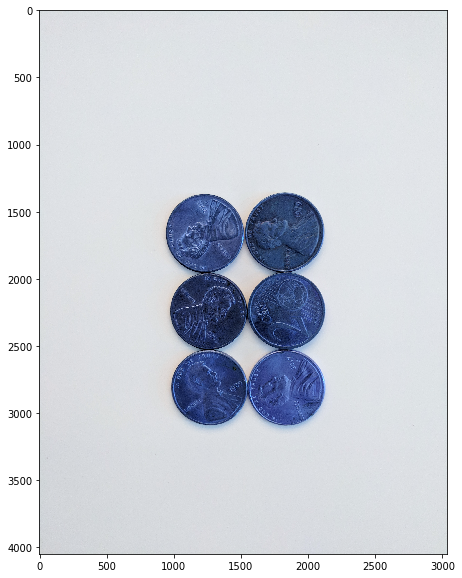

In [86]:
def display(img,cmap="gray"):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap="gray") 
img = cv2.imread("pennies.jpg")
display(img)

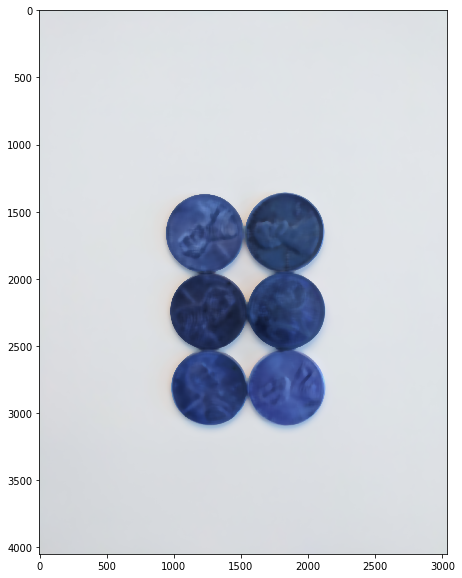

In [87]:
med_blur = cv2.medianBlur(img,35)
display(med_blur)

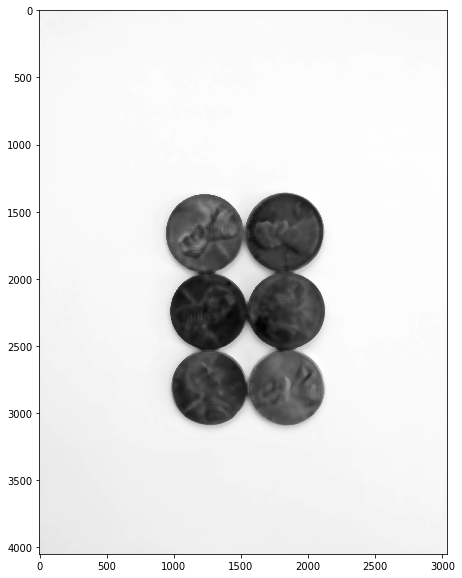

In [88]:
gray = cv2.cvtColor(med_blur,cv2.COLOR_BGR2GRAY)
display(gray)

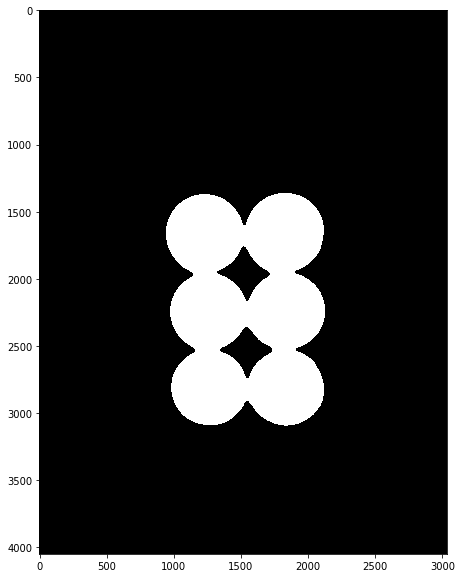

In [89]:
ret, thresh = cv2.threshold(gray,160,255,cv2.THRESH_BINARY_INV)
display(thresh)

In [90]:
image,contours,heirarchy = cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
heirarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [91]:
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

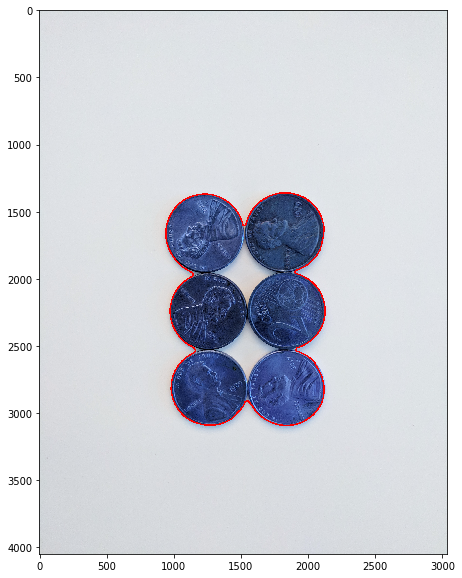

In [92]:
display(img)

In [108]:
kernel = np.ones((3,3),np.uint8)
thresh = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)


In [109]:
dist_trans = cv2.distanceTransform(thresh,cv2.DIST_L2,5)

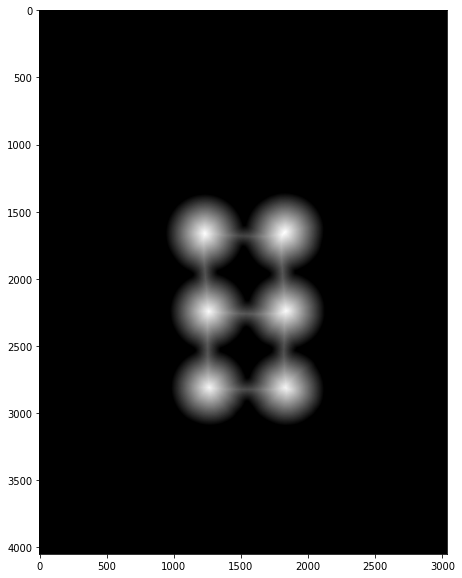

In [110]:
display(dist_trans)

In [111]:
ret,sure_fg =cv2.threshold(dist_trans,0.7*dist_trans.max(),255,0)

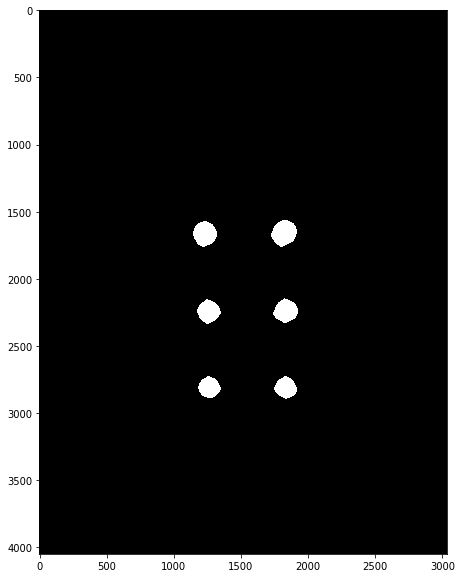

In [112]:
display(sure_fg)

In [113]:
 sure_fg = np.uint8(sure_fg)

In [114]:
unknown = cv2.subtract(thresh,sure_fg)

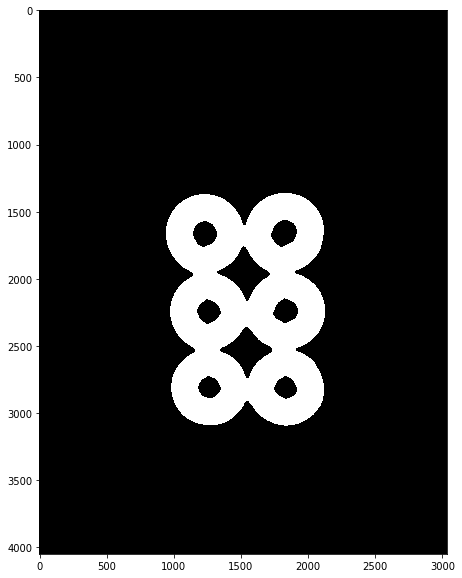

In [115]:
display(unknown)

In [116]:
ret, marker = cv2.connectedComponents(sure_fg)

In [117]:
marker - marker +1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [118]:
marker[unknown==225] =0

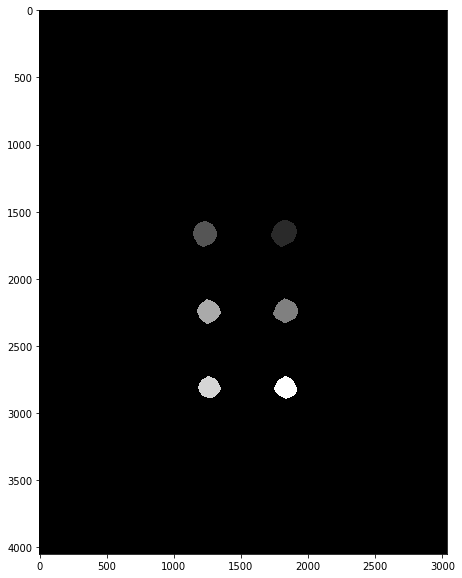

In [119]:
display(marker)

In [120]:
marker = cv2.watershed(img,marker)

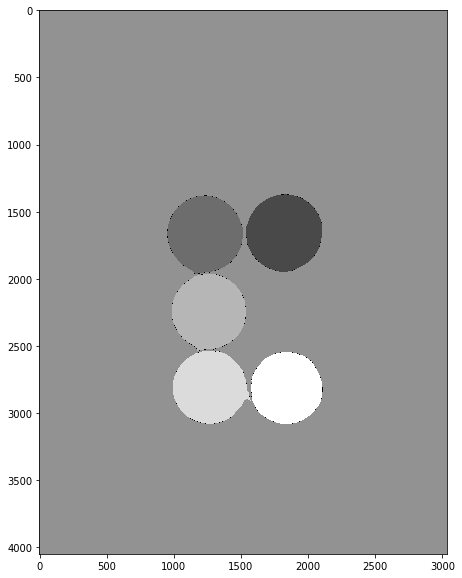

In [121]:
display(marker)

In [106]:
image,contours,heirarchy = cv2.findContours(marker.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)
len(contours)

8

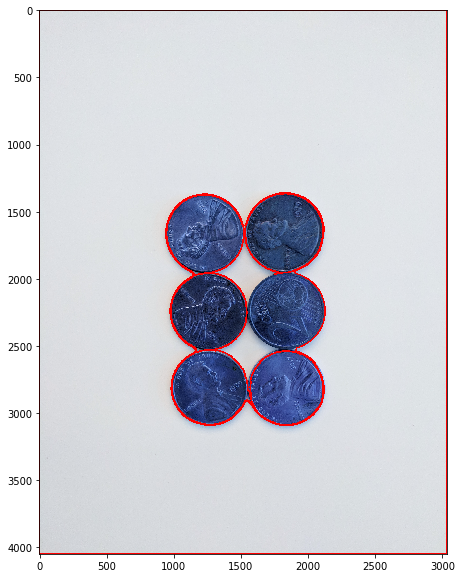

In [107]:
display(img)